# AokiApp NFT Performance Evaluation Demo

In [1]:
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA, NMF
from glob import glob
from procutil import *
import pickle

Load aoki face and Compute PCA on the data

In [2]:
compute_pca = False
model = None
if compute_pca:
  allimgs_rgb, alldata = load_with_tag("p:aoki")
  model = PCA(n_components=64)
  model.fit(allimgs_rgb)
  with open("pca.pickle", "wb") as f:
    pickle.dump(model, f)
else: 
  with open("pca.pickle", "rb") as f:
    model = pickle.load(f)

Draw the first 3 principal components

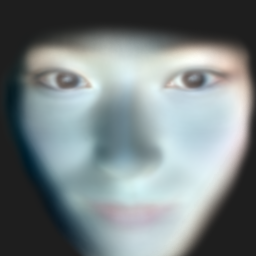

Dimension:  (196608,)


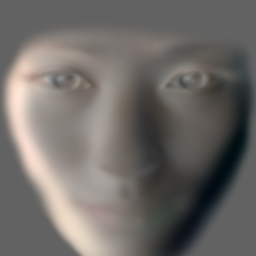

Dimension:  (196608,)


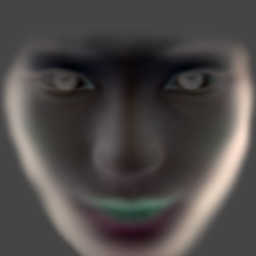

Dimension:  (196608,)


In [3]:
for i in range(3):
  img = model.components_[i]
  ishow(normalize255(img))
  print("Dimension: ", img.shape)

In [19]:
# calculate the component size in byte
print("Size of each component: ", model.components_.astype(np.uint8).nbytes / 1024 / 1024, "MB")

Size of each component:  12.0 MB


These components are (196608,1) vectors. We can reshape them to (256,256,3) and draw it.

These components are linear combination of the original data. We can reconstruct the original data by add-ing and mul-ing the components.

Now we select the vector with 64 random numbers. This will be a semi-fungible token in the AokiApp NFT. Users will purchase some of these tokens and use them to generate aoki faces.
For now, we just simulate the purchase of the token with random numbers.

In [4]:
# param_tokens is a vector of 64 random numbers
param_tokens = np.random.rand(64) 
print("Sum: %f, Mean: %f, stdev: %f" % (np.sum(param_tokens), np.mean(param_tokens), np.std(param_tokens)))

Sum: 32.480586, Mean: 0.507509, stdev: 0.271467


With this token, we can reconstruct the original data and generate aoki faces.

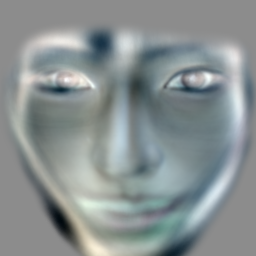

In [5]:
# composite and draw the inverse
pc = model.components_
inverse = param_tokens.T @ pc
ishow(normalize255(inverse))

For clearer visualization, we draw the original data and the reconstructed data in the same figure.

First, show the original data.

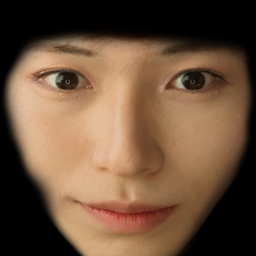

In [11]:
# load testimage.pickle
with open("testimage.pickle", "rb") as f:
  testimage = pickle.load(f)
ishow(testimage)

Then, calculate the principal components

In [ ]:
# compute the components of the test image
testimage_components = model.transform(testimage.reshape(1, -1))

# inverse the components
inverse = testimage_components.reshape(-1) @ pc + model.mean_
ishow(normalize255(to3d(inverse)))

Export the principal components to NumPy array

In [8]:
# print(testimage_components) with comma
cs = ",".join([str(x) for x in testimage_components.reshape(-1)])
print(f"np.array([{cs}])")

np.array([-2026.2439202503406,10743.759229062289,1099.5805515073612,5467.175996890743,1350.5007105463283,53.46111599894938,-1972.8328735502241,-54.45591145413751,-256.0553675733845,702.0616455609731,-954.889895390146,218.58544140369753,702.8653055817092,-582.3605742024829,-1379.5320968783144,567.4905265802554,-200.4018175341762,345.6609455204281,-527.6752077016157,-36.58989538311421,-562.7642902675534,-780.0580737895527,1.73882519094743,507.59061676172126,-533.3507493203394,250.26766477856648,86.57082468230307,-223.59724694914837,480.783615137797,73.10109380557545,433.75518355651536,308.16113779557674,-8.055169777250462,93.64684042016137,399.3952461390636,432.824491848236,531.9741925340386,46.63816503257789,203.5390130612944,384.208579792804,64.65710016595852,29.168451205453277,-1001.5319400411167,-158.36973560525774,56.493227593746965,291.61119547108734,567.2556058666353,-10.841221361220672,-146.11577410998126,-341.9529075721452,194.22879182618453,-4.595332561331166,148.85983314380766

Re-import the principal components from NumPy array above.
Users, that want to get a clear face image, will purchase tokens as follows in the AokiApp NFT.

In [9]:
good_token = np.array([-2026.2439202503406,10743.759229062289,1099.5805515073612,5467.175996890743,1350.5007105463283,53.46111599894938,-1972.8328735502241,-54.45591145413751,-256.0553675733845,702.0616455609731,-954.889895390146,218.58544140369753,702.8653055817092,-582.3605742024829,-1379.5320968783144,567.4905265802554,-200.4018175341762,345.6609455204281,-527.6752077016157,-36.58989538311421,-562.7642902675534,-780.0580737895527,1.73882519094743,507.59061676172126,-533.3507493203394,250.26766477856648,86.57082468230307,-223.59724694914837,480.783615137797,73.10109380557545,433.75518355651536,308.16113779557674,-8.055169777250462,93.64684042016137,399.3952461390636,432.824491848236,531.9741925340386,46.63816503257789,203.5390130612944,384.208579792804,64.65710016595852,29.168451205453277,-1001.5319400411167,-158.36973560525774,56.493227593746965,291.61119547108734,567.2556058666353,-10.841221361220672,-146.11577410998126,-341.9529075721452,194.22879182618453,-4.595332561331166,148.85983314380766,-1157.0498455026545,480.53835389593183,-509.4082281097036,-283.3615580920499,1073.5836181532475,-867.5126623581046,-151.95156849530989,-260.8639027690274,-55.36366178644648,671.5924097369275,-222.5715438820963])

Reconstruct the original data with the purchased token.

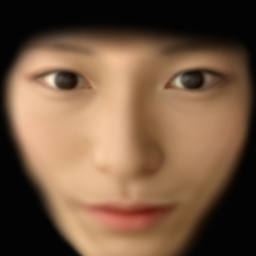

In [10]:
# reconstruct the image
inverse = good_token.reshape(-1) @ pc + model.mean_
ishow(normalize255(inverse))

Good image!

For better evaluation, we calculate the square-root mean squared error and cosine similarity between the original data and the reconstructed data.

In [17]:
#calculate the RMSE between the original image and the reconstructed image
rmse = np.sqrt(np.mean((inverse - testimage.reshape(-1)) ** 2))
print("RMSE(smaller is better): ", rmse)

# calculate the cosine similarity between the original image and the reconstructed image
cosine_similarity = np.dot(inverse, testimage.reshape(-1)) / (np.linalg.norm(inverse) * np.linalg.norm(testimage.reshape(-1)))
print("Cosine similarity(1.0 is the best): ", cosine_similarity)


RMSE(smaller is better):  7.878287916046079
Cosine similarity(1.0 is the best):  0.9973954160138264


Both RMSE and CosSim are nearly ideal values. 

Like this, we can generate aoki faces as NFT with the SFT in the AokiApp NFT.

This demo implies:
- Simple algorithm to reconstruct the original data from the principal components
- Good performance on the reconstruction
- Small size of the principal components
